## GET

In [14]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')
res

<Response [200]>

In [16]:
#res.text

## POST

In [4]:
import requests
url     = 'https://www.thsrc.com.tw/tw/TimeTable/Search'
payload = {
'StartStationName':  '台北站',
'EndStationName':  '新竹站',
'SearchType': 'S',
'StartStation': '977abb69-413a-4ccf-a109-0272c24fd490',
'EndStation': 'a7a04c89-900b-4798-95a3-c01c455622f4',
'DepartueSearchDate': '2019/06/04',
'DepartueSearchTime': '11:30' 
}
res = requests.post(url, data = payload)

In [5]:
res

<Response [200]>

In [8]:
#res.json()

In [11]:
import requests
res = requests.get('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=&type=&_=1559615412017')
res.json()['data2'][0:3]

[['寶島股價報酬指數', '14,430.14', "<p style ='color:green'>-</p>", '4.92', '-0.03'],
 ['發行量加權股價報酬指數', '18,734.92', "<p style ='color:red'>+</p>", '3.98', '0.02'],
 ['臺灣公司治理100報酬指數', '7,040.50', "<p style ='color:red'>+</p>", '19.03', '0.27']]

In [13]:
import requests
import time
for i in range(2):
    res = requests.get('http://www.twse.com.tw/exchangeReport/MI_INDEX?response=json&date=&type=&_=1559615412017')
    print(res.json()['data2'][0:3])
    time.sleep(3)

[['寶島股價報酬指數', '14,430.14', "<p style ='color:green'>-</p>", '4.92', '-0.03'], ['發行量加權股價報酬指數', '18,734.92', "<p style ='color:red'>+</p>", '3.98', '0.02'], ['臺灣公司治理100報酬指數', '7,040.50', "<p style ='color:red'>+</p>", '19.03', '0.27']]
[['寶島股價報酬指數', '14,430.14', "<p style ='color:green'>-</p>", '4.92', '-0.03'], ['發行量加權股價報酬指數', '18,734.92', "<p style ='color:red'>+</p>", '3.98', '0.02'], ['臺灣公司治理100報酬指數', '7,040.50', "<p style ='color:red'>+</p>", '19.03', '0.27']]


## BeautifulSoup

In [17]:
from bs4 import BeautifulSoup 
html_sample = ''' 
<html> 
 <body> 
 <h1 id="title">Hello World</h1> 
 <a href="#" class="link">This is link1</a> 
 <a href="# link2" class="link">This is link2</a> 
 </body> 
 </html>'''

soup = BeautifulSoup(html_sample, 'lxml')
print(soup.text)




Hello World
This is link1
This is link2




In [18]:
soup.select_one('h1')

<h1 id="title">Hello World</h1>

In [19]:
soup.select_one('h1').text

'Hello World'

In [20]:
soup.select('a')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [21]:
# id => #
soup.select_one('#title')

<h1 id="title">Hello World</h1>

In [23]:
# class => .
soup.select('.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [24]:
soup.select_one('h1#title')

<h1 id="title">Hello World</h1>

In [25]:
soup.select_one('body h1#title')

<h1 id="title">Hello World</h1>

In [26]:
soup.select_one('body h1')

<h1 id="title">Hello World</h1>

In [28]:
soup.select('a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [29]:
soup.select('body a.link')

[<a class="link" href="#">This is link1</a>,
 <a class="link" href="# link2">This is link2</a>]

In [31]:
for link in soup.select('a'):
    print(link.get('href'))

#
# link2


## 蘋果網路爬蟲

In [33]:
import requests
res = requests.get('https://tw.appledaily.com/new/realtime')

In [35]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [48]:
newsary = []
for news in soup.select('li.rtddt a'):
    #print(news)
    title = news.select_one('h1').text
    category = news.select_one('h2').text
    dt = news.select_one('time').text
    link = news.get('href')
    newsary.append({'title':title, 'category':category, 'dt': dt, 'link': link})
    #print(title, category, dt, link)
    #print('===============================')

## 使用Pandas整理資料

In [50]:
import pandas
df = pandas.DataFrame(newsary)

In [52]:
df.head()

,category,dt,link,title
0,社會,10:46,https://tw.news.appledaily.com/local/realtime/...,逆子狠砍20刀弒父 伴屍3天後棄屍橋下
1,財經,10:46,https://tw.finance.appledaily.com/realtime/201...,巴菲特午餐得標者曝光 中國28歲虛擬貨幣...
2,社會,10:46,https://tw.news.appledaily.com/local/realtime/...,女誤信友人能替她守住財庫 洩漏提款卡密碼...
3,3C,10:45,https://tw.lifestyle.appledaily.com/gadget/rea...,【WWDC直擊】Apple發表會10大亮...
4,娛樂,10:40,https://tw.entertainment.appledaily.com/realti...,曝賀一航生前大轉變 曹西平嘆「他很拚，什...


## 將資料匯出成Excel

In [53]:
df.to_excel('applenews.xlsx')

In [ ]:
template = '''
<li class="rtddt busi">
    <a href="https://tw.finance.appledaily.com/realtime/20190604/1578232/" target="_blank">
          <time>10:46</time>
          <h2>財經</h2>
          <h1><font color="#383c40">巴菲特午餐得標者曝光　中國28歲虛擬貨幣...</font></h1>
    </a>
</li>
<li class="rtddt ccc">
       <a href="https://tw.lifestyle.appledaily.com/gadget/realtime/20190604/1577566/" target="_blank">
                                        <time>10:45</time>
                                        <h2>3C</h2>
                                        <h1><font color="#ff0000">【WWDC直擊】Apple發表會10大亮...</font></h1>
                                    </a>
</li>
'''

## 591 租屋網爬蟲

In [55]:
import requests
res = requests.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow=30&totalRows=786')

In [57]:
#res.text

In [71]:
rs = requests.session()
res = rs.get('https://rent.591.com.tw/?kind=1&region=1&section=5')
soup = BeautifulSoup(res.text, 'lxml')
token = soup.select_one('meta[name="csrf-token"]')['content']

In [73]:
headers ={
 'X-CSRF-TOKEN': token,
'X-Requested-With': 'XMLHttpRequest'   
    
}
dataary = []
for p in range(int(786 / 30) + 1 ) :   
    res2 = rs.get('https://rent.591.com.tw/home/search/rsList?is_new_list=1&type=1&kind=1&searchtype=1&region=1&section=5&firstRow={}&totalRows=786'.format(p), headers = headers)
    jd = res2.json()['data']['data']
    df = pandas.DataFrame(jd)
    dataary.append(df)

In [76]:
dfall = pandas.concat(dataary)
dfall.head(3)

,addInfo,addition2,addition3,addition4,addr_number_name,address,address_img,address_img_title,alley_name,allfloor,...,storeprice,street_name,streetid,type,unit,updatetime,user_id,vipBorder,vipimg,vipstyle
0,,0,0,1,,和平東路一段師大古亭商圈..,師大古亭商圈電梯大樓經典時尚溫馨美宅,師大古亭商圈電梯大樓經典時尚溫馨美宅,,19,...,0,和平東路一段,25632,1,元/月,1559287270,2555111,vipStyle,,isvip
1,,0,0,1,86號,光復南路高樓層大巨蛋正對..,高樓層大巨蛋正對面近捷運國父紀念館站,高樓層大巨蛋正對面近捷運國父紀念館站,,13,...,0,光復南路,25623,1,元/月,1558932105,452502,vipStyle,,isvip
2,,0,0,1,,信義路三段台北大安森林公..,台北大安森林公園(可短租/設籍/營登),台北大安森林公園(可短租/設籍/營登),,14,...,0,信義路三段,25647,1,元/月,1556941550,104199,vipStyle,,isvip


In [80]:
#dfall.columns

In [81]:
dfall = dfall[['address', 'area', 'price', 'layout']]

In [83]:
dfall['price'] = dfall['price'].map(lambda e: int(e.replace(',', '')))

/Users/davidchiu/.pyenv/versions/3.6.2/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


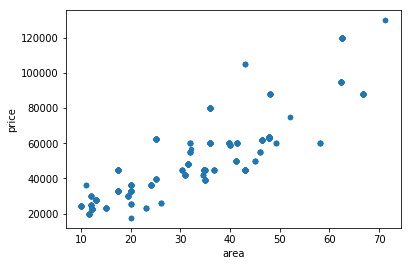

In [86]:
%pylab inline
dfall.plot(x = 'area', y = 'price', kind = 'scatter')

In [93]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
clf = GradientBoostingRegressor()
y = dfall['price'].values
x = dfall[['area']]
clf.fit(x, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [91]:
import numpy
clf.predict(numpy.array([[20]]))

array([34093.97031171])

In [92]:
import numpy
clf.predict(numpy.array([[30]]))

array([47064.68913756])

In [94]:
import requests
res = requests.get('https://www.google.com/search?ei=mOP1XIOkJJP8wQOHx4fIDA&rlz=1C5CHFA_enTW718TW718&yv=3&q=%E5%91%A8%E5%AD%90%E7%91%9C&tbm=isch&vet=10ahUKEwiD0NzA787iAhUTfnAKHYfjAckQuT0IYigB.mOP1XIOkJJP8wQOHx4fIDA.i&ved=0ahUKEwiD0NzA787iAhUTfnAKHYfjAckQuT0IYigB&ijn=1&start=100&asearch=ichunk&async=_id:rg_s,_pms:s,_fmt:pc')
from bs4 import BeautifulSoup
soup = BeautifulSoup(res.text, 'lxml')

In [97]:
for ele in soup.select('img'):
    if ele.get('src'):
        link = ele.get('src')
        link.split('tb')

https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcT8Kf_r2MRXG31drhbMfABDDUQkaSMVrsIn2GQ_qTTg_C7Tsxn7
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSPA6GuGGOIlwL_b2eB9NBiS23_RD8zTP4Q1MQns40-iopmzng_jA
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSHfEPFBfSeKzj7XCrDsP4AxNGBheQx6zVUIf1zooifUly-XaPz
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTgCaYCfpBWNwcRdYdPDbBQsFvog82SoiRtpZQcUWR6kzh6Ixnm0A
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSJLMKdMfwK1Edkgxl7uIXJ2OHWCeUcgroRKpzhZGxIGeONO8rw
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSnvrb2p_vouek-DZXfnYylRaRcxxLuizjzhlAmaK6czr5xU-5Y
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTFUZy00n_S3GhdEjMgCpKbea9dFg6_fqpv27AQghL9fa4ilyNmQw
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSBENnjNbe030FMpT_OhVyp7-xfHHn1EvL4rrdPpELBIWpJ0T6m
https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRM9qairXlhTJNB6-JkJmPkUBagry07rTVnPUJHBhpoMJsKyChwfg
https://encrypted-tbn0.gstatic.com/images?q=tbn